# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | as sulayyil
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | bubaque
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | cabedelo
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | danielskuil
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | lolodorf
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | boundiali
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | flying fish cove
Pro

In [41]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64


In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,16.25,41,75,8.75,CL,1735333595
1,avarua,-21.2078,-159.7750,27.03,94,20,4.12,CK,1735333597
2,adamstown,-25.0660,-130.1015,24.11,77,97,3.55,PN,1735333598
3,as sulayyil,20.4607,45.5779,17.24,38,83,3.93,SA,1735333600
4,waitangi,-43.9535,-176.5597,16.01,99,100,3.13,NZ,1735333601


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,16.25,41,75,8.75,CL,1735333595
1,avarua,-21.2078,-159.7750,27.03,94,20,4.12,CK,1735333597
2,adamstown,-25.0660,-130.1015,24.11,77,97,3.55,PN,1735333598
3,as sulayyil,20.4607,45.5779,17.24,38,83,3.93,SA,1735333600
4,waitangi,-43.9535,-176.5597,16.01,99,100,3.13,NZ,1735333601


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

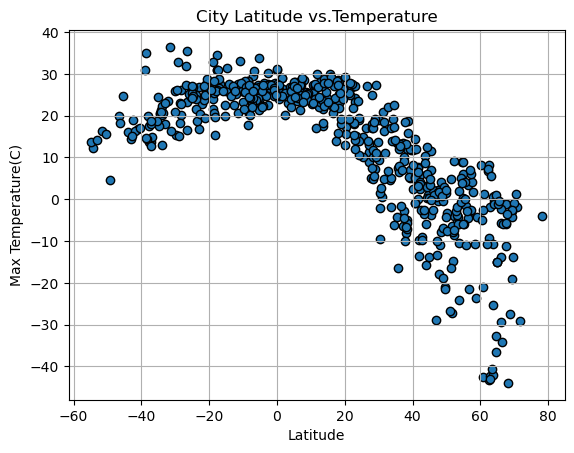

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

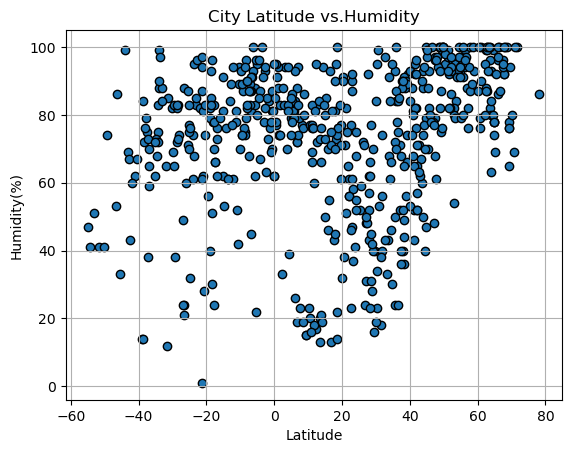

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

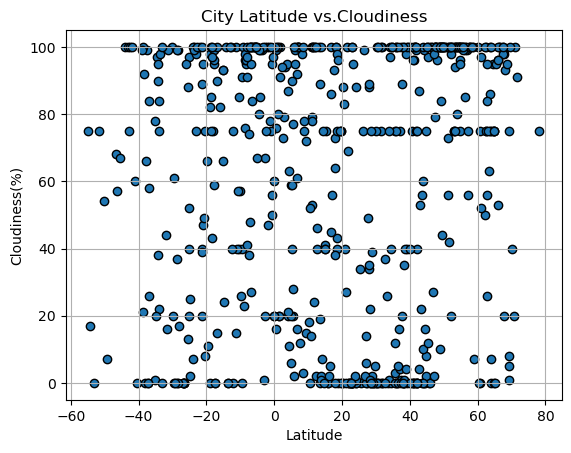

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

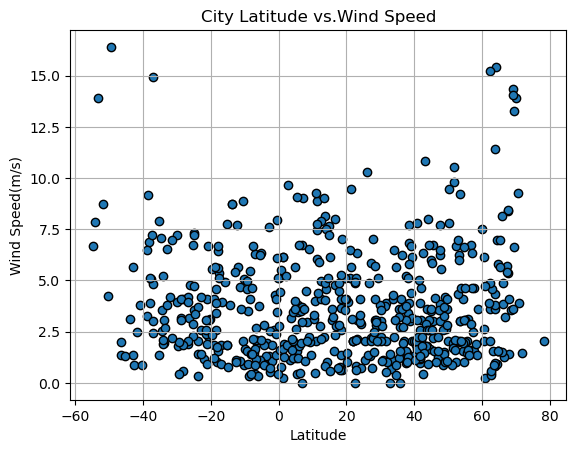

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values, eq_loc):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Equation of the regression line
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Plot scatter and regression line
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regress_values, "r-", label="Regression Line")
    plt.annotate(line_eq, eq_loc, fontsize=15, color="red")
    
    # Print r-squared value
    print(f"The r^2-value is: {r_value**2}")
    print(f"The r-value is: {r_value}")
    # Display the plot
    plt.legend()

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,as sulayyil,20.4607,45.5779,17.24,38,83,3.93,SA,1735333600
5,badger,64.8000,-147.5333,-15.07,78,75,1.54,US,1735333602
8,yellowknife,62.4560,-114.3525,-9.21,99,75,3.60,CA,1735333606
9,longyearbyen,78.2186,15.6401,-4.09,86,75,2.06,SJ,1735333607
11,bubaque,11.2833,-15.8333,26.27,69,53,6.03,GW,1735333610


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,16.25,41,75,8.75,CL,1735333595
1,avarua,-21.2078,-159.7750,27.03,94,20,4.12,CK,1735333597
2,adamstown,-25.0660,-130.1015,24.11,77,97,3.55,PN,1735333598
4,waitangi,-43.9535,-176.5597,16.01,99,100,3.13,NZ,1735333601
6,margaret river,-33.9500,115.0667,13.06,88,22,1.94,AU,1735333603


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6803692012117164
The r-value is: -0.8248449558624436


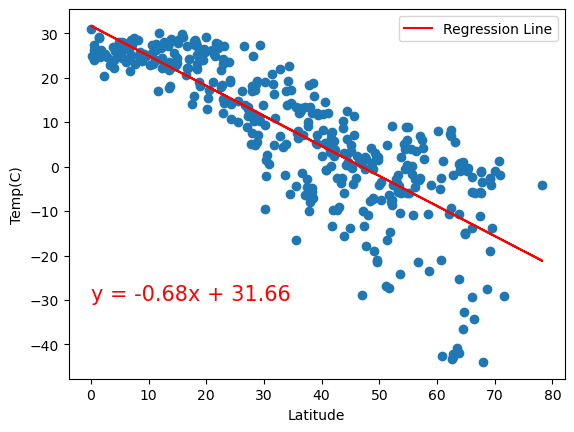

In [45]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(0, -30))
plt.xlabel('Latitude')
plt.ylabel('Temp(C)')
plt.show()

The r^2-value is: 0.32110330360796024
The r-value is: 0.5666597776514231


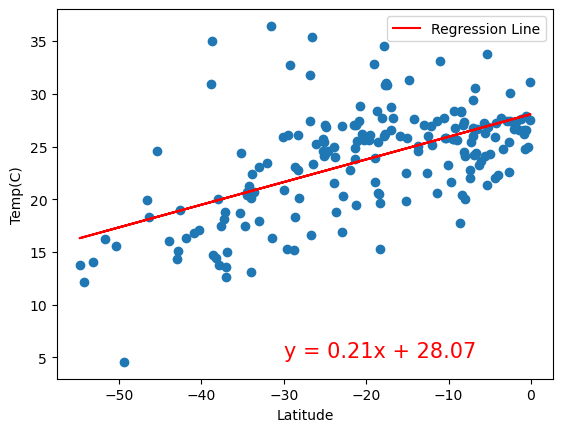

In [46]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))
plt.xlabel('Latitude')
plt.ylabel('Temp(C)')
plt.show()

**Discussion about the linear relationship:** The regression analysis shows a significant correlation between latitude and maximum temperature, as evidenced with the data points condencing around the regression line. The R-Value being especially high in the Northern Hemisphere compared to the Southern. We can say these range from a moderate to strong positive correlations.

* Northern Hemisphere R-Value: 0.68
* Southern Hemisphere R-Value: 0.32

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.15172327568107122
The r-value is: 0.3895167206694357


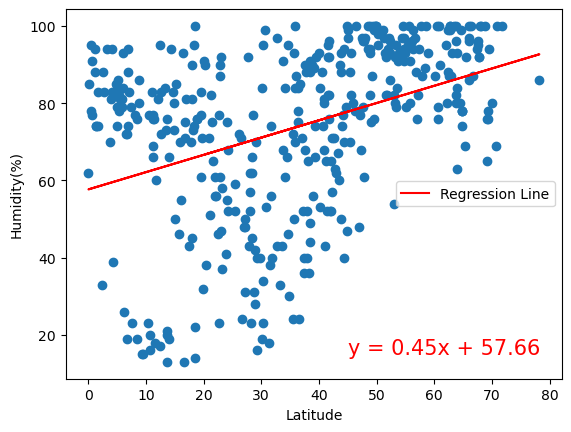

In [47]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(45, 15))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.show()

The r^2-value is: 0.11824323255212044
The r-value is: 0.3438651371571716


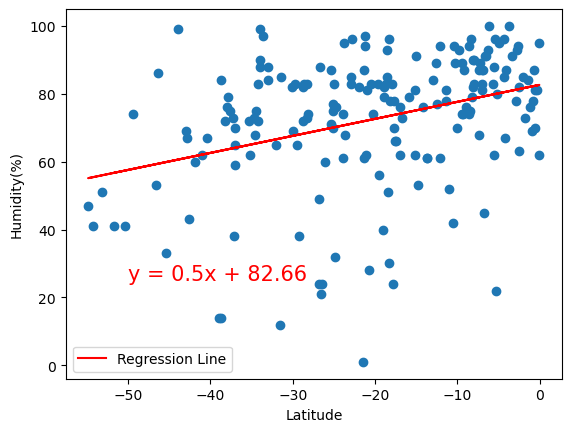

In [48]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.show()

**Discussion about the linear relationship:** Compared to the previous R-Values we saw previously, these are much less related but we can safely say there is still a positive correlation between Humidity and Latitude as shown by the R-Values. We can say that these are negligible correlations although they remain positive, however weak.

* Northern Hemisphere R-Value: 0.15
* Southern Hemisphere R-Value: 0.12

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.037595694531352135
The r-value is: 0.19389609209922756


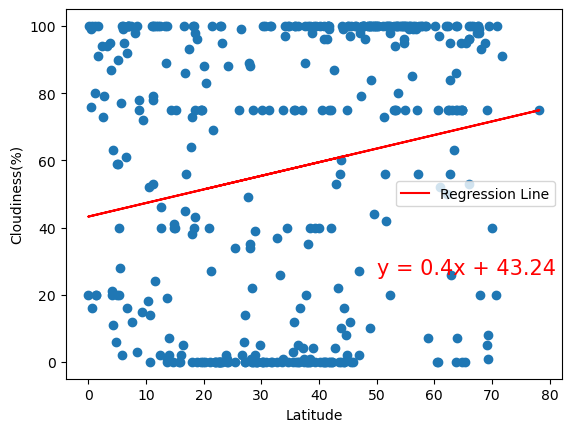

In [49]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 26))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()

The r^2-value is: 0.04965838811560387
The r-value is: 0.22284162114740566


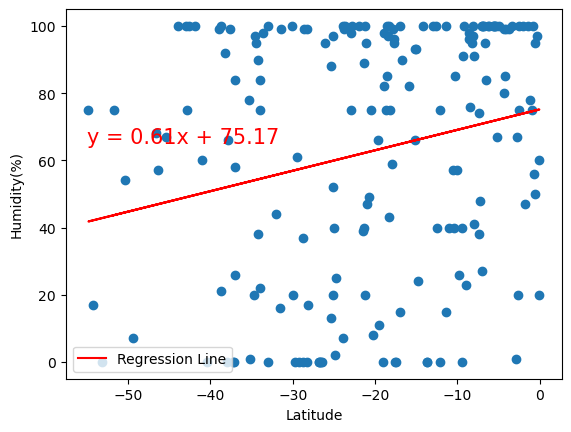

In [50]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-55, 65))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.show()

**Discussion about the linear relationship:** Like the previous R-Values, these also display a minimal positive correlation. It is however very weak.

* Northern Hemisphere R-Value: 0.04
* Southern Hemisphere R-Value: 0.05

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.010788872620856161
The r-value is: 0.10386949802928751


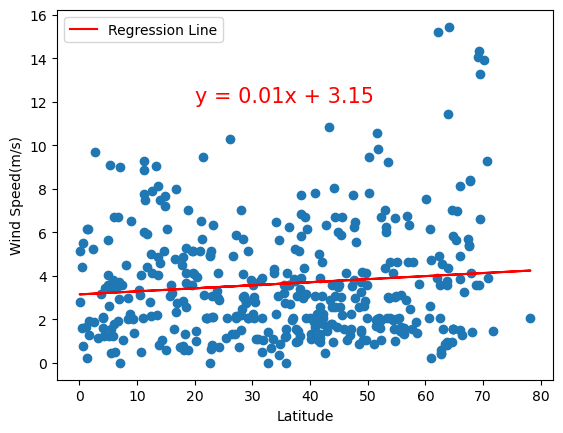

In [51]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(20, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.show()

The r^2-value is: 0.09294969773180245
The r-value is: -0.3048765286666103


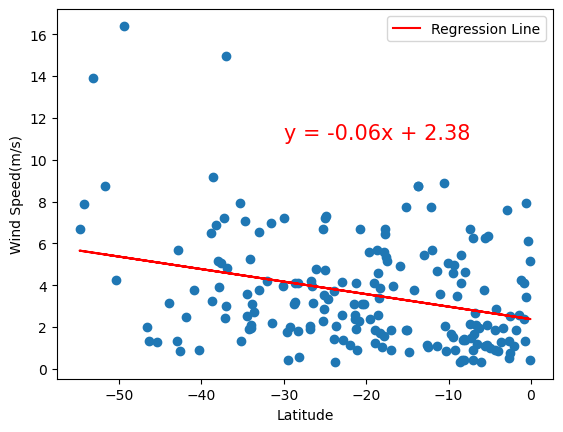

In [52]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-30, 11))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.show()

**Discussion about the linear relationship:** These are an interesting pair out of the bunch due to how different they are from the others. Most have reacted the same in both hemispheres but this one has had a change in R-Value that was significant due to a bigger correlation in the southern hemisphere than the northern. It is still a negligible correlation in both cases.

* Northern Hemisphere R-Value: 0.01
* Southern Hemisphere R-Value: 0.09